<h1>Titanic with Logistic Regression</h1>

<p style="font-size:18px">This tutorial will only touch the basics of machine learning and will not go into depths of graphical analysis of data. 
I already did graphic analysis in one of my earlier works. Therefore I limit myself here to practice Logostic regression.<br>
<br>    
The machine learning model is supposed to predict who survived or not. I am going to build a machine learning model using Logistic Regression.<br>
<br>
Source for Dataset "Titanic": Kaggle</p>

<h2>1. Initialising, importing and loading of data</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('talk')

# for logistic regression:
from sklearn.model_selection import train_test_split # split data into test and train
from sklearn.linear_model import LogisticRegression  # linear regression
from sklearn.metrics import classification_report  # classification report

# for Confusion Matrix
from sklearn import metrics

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

<h2>2. Data Cleaning</h2>

<p style="font-size:18px">The dataset contains double columns with the same info, because it is a merge with data from wikipedia.<br> 
And there are a few columns with missing data.<br>
Object data types are non-numeric so I have to find a way to encode them to numerical values.<br>
First I am going to drop all columns I don't use.</p>

In [5]:
data.drop(["WikiId", "Age_wiki", "Body", "Lifeboat", "Ticket", "Cabin", "Name", "Name_wiki", "Hometown", "Boarded", "Destination", "Class"], axis=1, inplace=True)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 92.2+ KB


In [8]:
100*data.isnull().sum()/len(data)

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Fare            0.076394
Embarked        0.152788
dtype: float64

<h3>2.1 Reducing missing data</h3>

In [9]:
data["Age"].median()

28.0

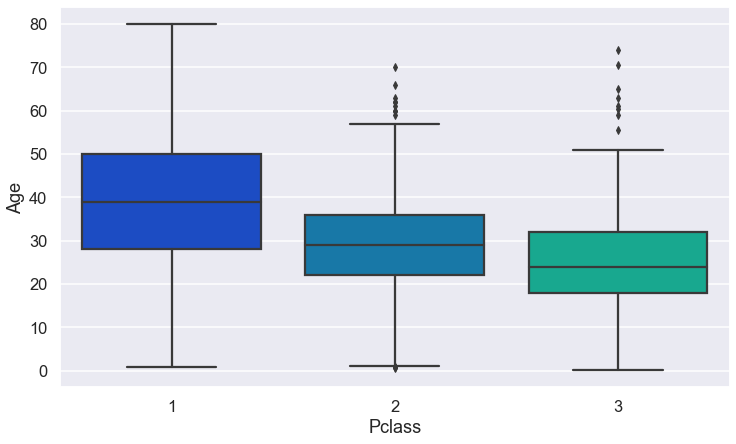

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))
sns.boxplot(x="Pclass",y="Age",data=data,palette="winter")

<p style="font-size:18px">The wealthier passengers in the higher classes tend to be older.<br>
This makes perfect sense. I now use these averages to insert the age using the Pclass column.</p>

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 28

        else:
            return 24

    else:
        return Age

In [12]:
data["Age"] = data[["Age","Pclass"]].apply(impute_age,axis=1)

In [13]:
100*data.isnull().sum()/len(data)

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Fare            0.076394
Embarked        0.152788
dtype: float64

In [14]:
data["Age"] = data["Age"].astype(int)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   int32  
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Embarked     1307 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 87.1+ KB


In [16]:
data["Survived"].unique()

array([ 0.,  1., nan])

In [17]:
data["Survived"].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [18]:
data=data.dropna()

In [19]:
data["Survived"] = data["Survived"].astype(int)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int32  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    int32  
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(2)
memory usage: 62.5+ KB


<h3>2.2 Converting columns with categorical values</h3>
<p style="font-size:18px">We have two: "Embarked" and "Sex".</p>

In [21]:
pd.get_dummies(data["Sex"], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [22]:
sex = pd.get_dummies(data["Sex"], drop_first=True)

In [23]:
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [24]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
data = pd.concat([data, sex, embark], axis=1)

In [26]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22,1,0,7.2500,S,1,0,1
1,2,1,1,female,38,1,0,71.2833,C,0,0,0
2,3,1,3,female,26,0,0,7.9250,S,0,0,1
3,4,1,1,female,35,1,0,53.1000,S,0,0,1
4,5,0,3,male,35,0,0,8.0500,S,1,0,1


In [27]:
data.drop(["Sex", "Embarked"], axis=1, inplace=True)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22,1,0,7.2500,1,0,1
1,2,1,1,38,1,0,71.2833,0,0,0
2,3,1,3,26,0,0,7.9250,0,0,1
3,4,1,1,35,1,0,53.1000,0,0,1
4,5,0,3,35,0,0,8.0500,1,0,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int32  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    int32  
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   male         889 non-null    uint8  
 8   Q            889 non-null    uint8  
 9   S            889 non-null    uint8  
dtypes: float64(1), int32(2), int64(4), uint8(3)
memory usage: 51.2 KB


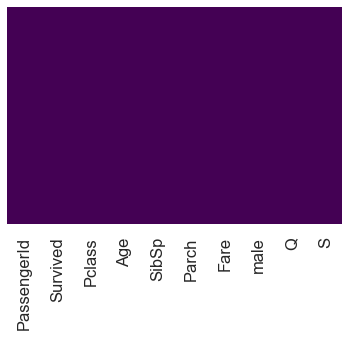

In [30]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<p style="font-size:16px">The data set looks to be clean.</p>

<h2>3. Logistic Regression</h2>

<h3>3.1 Split Data</h3>

In [31]:
X = data[["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare", "male", "Q", "S"]]
y = data["Survived"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

<h3>3.2 Train Data</h3>

In [33]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

<h3>3.3 Prediction</h3>

In [34]:
predictions = logmodel.predict(X_test)

<h4>3.3.1 Create a classification report for the model</h4>

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       163
           1       0.84      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



<p style="font-size:16px">precision: 84% of the passengers predicted by the Logistic Regression Model survived.<br>
recall: At the same time, the model identified 69% of all passengers wich survived</p>

<h4>3.3.2 Performance test with Confusion Matrix</h4>

In [36]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[149,  14],
       [ 32,  72]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

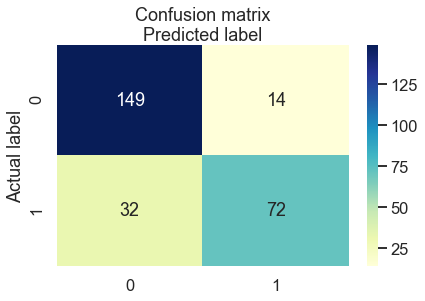

In [37]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<p style="font-size:16px">The foundation of a confusion matrix is the number of correct and incorrect predictions that are grouped together by class.
Dimensions 149 and 72 are the actual predictions, 14 and 32 are the are false predictions.<br>
That means, that the modell works well and shows good results.</p>